In [2]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

In [16]:
tweets_df = pd.read_csv("C:/Users/Asus/Downloads/Ethereum_tweets/Ethereum_tweets.csv")

In [17]:
tweets_df.describe()

,user_followers,user_friends,user_favourites
count,1.000000e+04,10000.000000,10000.00000
mean,3.407436e+03,879.184100,3594.31600
std,4.144713e+04,3700.326665,15861.80172
min,0.000000e+00,0.000000,0.00000
25%,2.600000e+01,36.000000,32.00000
50%,1.530000e+02,178.000000,336.50000
75%,7.720000e+02,667.250000,1948.25000
max,3.206537e+06,200574.000000,951778.00000


In [18]:
tweets_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,#1 Crypto Currency TRADING,NaN,"Profit thought trading, Learn , Trade & Earn💲....",2021-11-10 10:42:01+00:00,4,0,0,False,2021-11-15 07:26:39+00:00,Get upto 1000 that’s 10x with our premium spot...,NaN,Twitter for Android,False
1,Reyrey,Kuala Lumpur,Artist | NFT Broker & Collector for AnideaNFT ...,2011-03-07 07:22:57+00:00,343,650,589,False,2021-11-15 07:26:35+00:00,"Adopted a Hypocat #053, “Crazy Rich Cat” 🤑💵💵💵🤩...","['SupportingCreators', 'CryptoArt', 'CryptoArt...",Twitter for iPhone,False
2,akter jahan,NaN,NaN,2021-10-28 13:28:05+00:00,1,2,0,False,2021-11-15 07:26:32+00:00,Top 10 Coins by Social Engagement over the las...,"['LunarCrush', 'bitcoin', 'dogecoin']",Twitter Web App,False
3,riyan,NaN,i always paricipated your project,2021-09-16 16:59:11+00:00,11,127,99,False,2021-11-15 07:26:30+00:00,Requesting faucet funds into 0x5278942b39deD8c...,"['Rinkeby', 'Ethereum']",Twitter Web App,False
4,Michelle Eriksen,NaN,"Art Creator, NFT, Crypto",2021-08-11 06:40:08+00:00,522,1428,16,False,2021-11-15 07:26:30+00:00,New Listing BTS 0.008ETH !! \n#NFTs #nftcolle...,"['NFTs', 'nftcollector', 'NFTCommunity', 'art'...",Twitter Web App,False


In [19]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [20]:
missing_data(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,0,5039,1372,0,0,0,0,0,0,0,2472,0,0
Percent,0.0,50.39,13.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.72,0.0,0.0
Types,object,object,object,object,int64,int64,int64,bool,object,object,object,object,bool


In [21]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))


In [22]:
unique_values(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,10000,4961,8628,10000,10000,10000,10000,10000,10000,10000,7528,10000,10000
Uniques,4932,1503,4089,4961,1683,1683,2375,2,9148,9836,2678,183,1


In [23]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [24]:
most_frequent_values(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,10000,4961,8628,10000,10000,10000,10000,10000,10000,10000,7528,10000,10000
Most frequent item,REAL-TIME STOCK NEWS ALERT,"Johnson City, VA",Stay on top of every headline that matters to ...,2020-08-24 16:32:36+00:00,0,0,0,False,2021-11-15 00:00:00+00:00,Requesting faucet funds into 0x000000000000000...,"['Rinkeby', 'Ethereum']",Twitter Web App,False
Frequence,174,174,174,174,412,474,790,9971,5,50,866,4076,10000
Percent from total,1.74,3.507,2.017,1.74,4.12,4.74,7.9,99.71,0.05,0.5,11.504,40.76,100.0


In [30]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    
    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128051 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128051 missing from current font.
  font.set_text(s, 0, flags=flags)


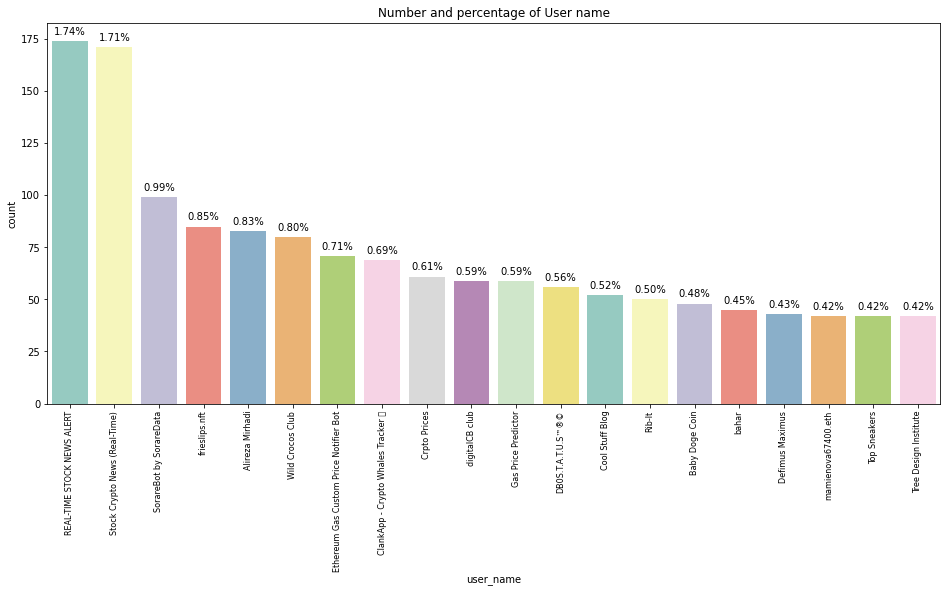

In [32]:
plot_count("user_name", "User name", tweets_df , 4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


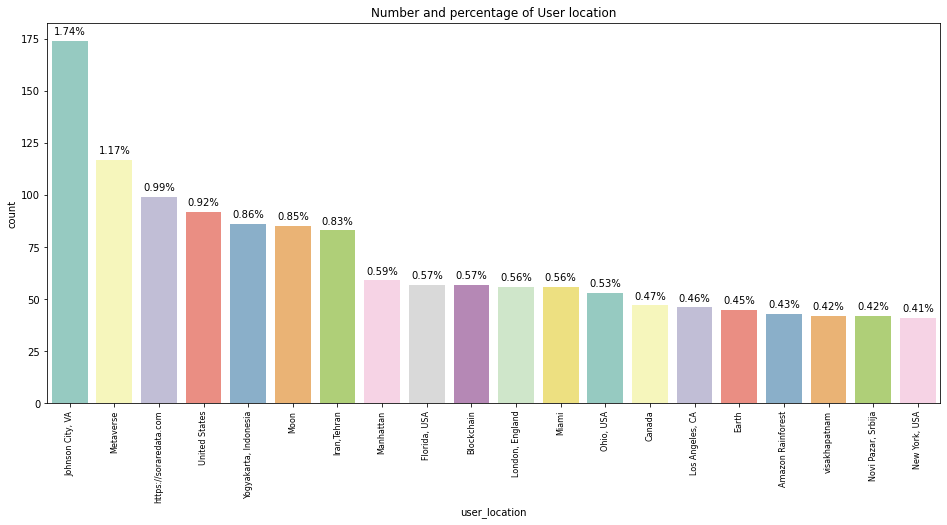

In [33]:
plot_count("user_location", "User location", tweets_df,4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


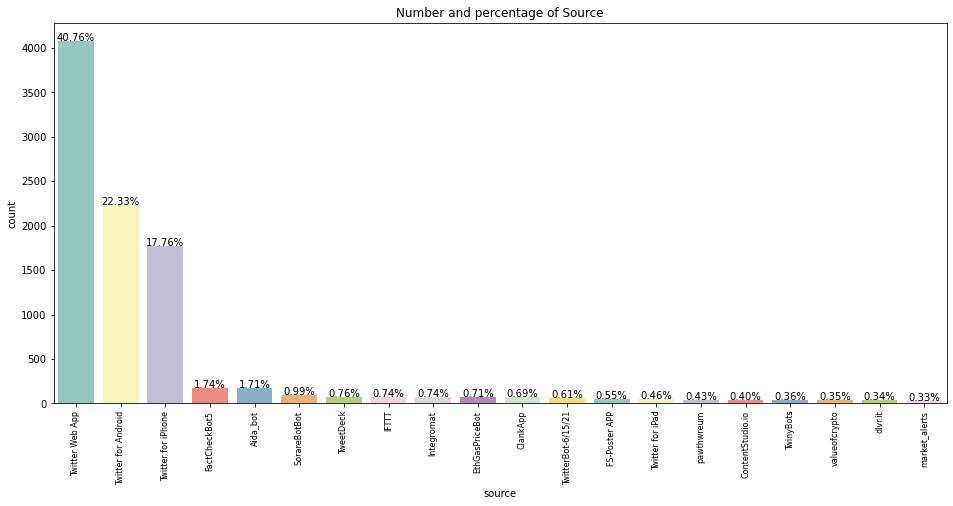

In [34]:
plot_count("source", "Source", tweets_df,4)

In [37]:
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

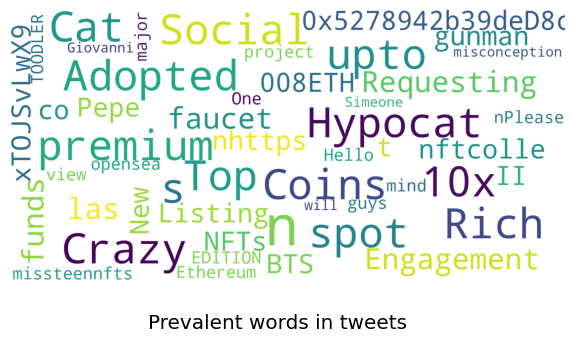

In [38]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

Hashtag Analysis

In [39]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


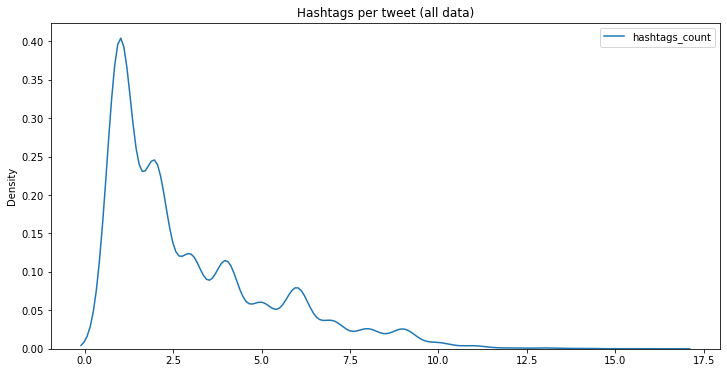

In [40]:
tweets_df['hashtags'] = tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df['hashtags_count'] = tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df)

In [41]:
tweets_df['hashtags_individual'] = tweets_df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(tweets_df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

There are totally: 3364


In [44]:
country_df = pd.read_csv("C:/Users/Asus/Downloads/Country Codes/f09c0f88344a7fcef373-2753c482ad091c54b1822288ad2e4811c021d8ec/wikipedia-iso-country-codes.csv")

In [45]:
country_df.columns = ["country", "alpha2", "alpha3", "numeric", "iso"]
country_df.head()

,country,alpha2,alpha3,numeric,iso
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS
